In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [2]:
data = pd.read_csv('file_02.csv')

In [3]:
data

,index,Date,Region,Thermal_Gen_Act_in_MU,Thermal_Gen_Estim_in_MU,Nuclear_Gen_Act_in_MU,Nuclear_Gen_Estim_in_MU,Hydro_Gen_Act_in_MU,Hydro_Gen_Estim_in_MU
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21
...,...,...,...,...,...,...,...,...,...
4940,305,2020-08-01,Northern,669.47,602.96,26.88,23.41,348.72,351.98
4941,306,2020-08-01,Western,"1,116.00","1,262.10",42.37,36.63,54.67,20.28
4942,307,2020-08-01,Southern,494.66,415.53,61.83,26.28,93.49,77.25
4943,308,2020-08-01,Eastern,482.86,547.03,NaN,NaN,87.22,93.78


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    4945 non-null   int64  
 1   Date                     4945 non-null   object 
 2   Region                   4945 non-null   object 
 3   Thermal_Gen_Act_in_MU    4945 non-null   object 
 4   Thermal_Gen_Estim_in_MU  4945 non-null   object 
 5   Nuclear_Gen_Act_in_MU    2967 non-null   float64
 6   Nuclear_Gen_Estim_in_MU  2967 non-null   float64
 7   Hydro_Gen_Act_in_MU      4945 non-null   float64
 8   Hydro_Gen_Estim_in_MU    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


# Dropping Index Column/Checking Missing Values

In [5]:
data = data.drop('index', axis=1)

In [6]:
data.isna().mean()

Date                       0.0
Region                     0.0
Thermal_Gen_Act_in_MU      0.0
Thermal_Gen_Estim_in_MU    0.0
Nuclear_Gen_Act_in_MU      0.4
Nuclear_Gen_Estim_in_MU    0.4
Hydro_Gen_Act_in_MU        0.0
Hydro_Gen_Estim_in_MU      0.0
dtype: float64

In [7]:
for column in ['Nuclear_Gen_Act_in_MU', 'Nuclear_Gen_Estim_in_MU']:
    data[column] = data[column].fillna(data[column].mean())

In [8]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


# Removing Commas From Thermal Columns

In [9]:
for column in ['Thermal_Gen_Act_in_MU', 'Thermal_Gen_Estim_in_MU']:
    data[column] = data[column].apply(lambda x: np.float(x.replace(',', '')))

<ipython-input-9-c561f8307310>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[column] = data[column].apply(lambda x: np.float(x.replace(',', '')))


In [10]:
data

,Date,Region,Thermal_Gen_Act_in_MU,Thermal_Gen_Estim_in_MU,Nuclear_Gen_Act_in_MU,Nuclear_Gen_Estim_in_MU,Hydro_Gen_Act_in_MU,Hydro_Gen_Estim_in_MU
0,2017-09-01,Northern,624.23,484.21,30.360000,35.570000,273.27,320.81
1,2017-09-01,Western,1106.89,1024.33,25.170000,3.810000,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.730000,49.800000,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,37.242208,36.987877,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,37.242208,36.987877,24.64,21.21
...,...,...,...,...,...,...,...,...
4940,2020-08-01,Northern,669.47,602.96,26.880000,23.410000,348.72,351.98
4941,2020-08-01,Western,1116.00,1262.10,42.370000,36.630000,54.67,20.28
4942,2020-08-01,Southern,494.66,415.53,61.830000,26.280000,93.49,77.25
4943,2020-08-01,Eastern,482.86,547.03,37.242208,36.987877,87.22,93.78


In [11]:
data.dtypes

Date                        object
Region                      object
Thermal_Gen_Act_in_MU      float64
Thermal_Gen_Estim_in_MU    float64
Nuclear_Gen_Act_in_MU      float64
Nuclear_Gen_Estim_in_MU    float64
Hydro_Gen_Act_in_MU        float64
Hydro_Gen_Estim_in_MU      float64
dtype: object

In [12]:
state_df = pd.read_csv('State_Region_corrected.csv')
state_df 

,State_or_UT,Area_in_km2,Region,National_Share_in_%
0,Rajasthan,342239,Northern,10.550
1,Madhya Pradesh,308350,Central,9.370
2,Maharashtra,307713,Western,9.360
3,Uttar Pradesh,240928,Northern,7.330
4,Gujarat,196024,Western,5.960
5,Karnataka,191791,Southern,5.830
6,Andhra Pradesh,162970,Southern,4.870
7,Odisha,155707,Eastern,4.730
8,Chhattisgarh,135191,Central,4.110
9,Tamil Nadu,130058,Southern,3.950


<AxesSubplot:xlabel='National_Share_in_%', ylabel='State_or_UT'>

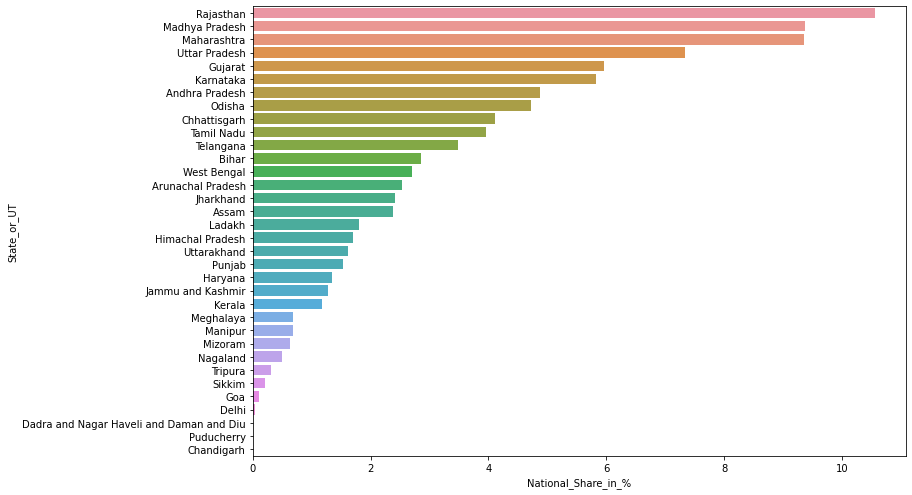

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x="National_Share_in_%", y="State_or_UT", data=state_df)

In [51]:
state = state_df.groupby('Region')['National_Share_in_%'].sum().sort_values(ascending = False)
state.index
fig = px.pie(state,values = state.values, names=state.index,
            title='.                                          .Distribution of Power Region Wise')
fig.show()

In [15]:
daily_gen = data.groupby("Date").sum()
daily_gen

,Thermal_Gen_Act_in_MU,Thermal_Gen_Estim_in_MU,Nuclear_Gen_Act_in_MU,Nuclear_Gen_Estim_in_MU,Hydro_Gen_Act_in_MU,Hydro_Gen_Estim_in_MU
Date,,,,,,
2017-09-01,2777.91,2532.39,192.744415,163.155753,567.42,497.69
2017-09-02,2777.91,2563.37,192.744415,166.255753,567.42,495.64
2017-09-03,2777.77,2533.23,192.744415,166.545753,567.42,473.05
2017-09-04,2777.77,2714.28,192.744415,166.595753,567.42,500.36
2017-09-05,2790.85,2779.65,192.744415,166.685753,567.42,470.16
...,...,...,...,...,...,...
2020-07-28,2961.63,2986.04,205.564415,163.295753,525.77,589.50
2020-07-29,2961.63,2918.86,205.564415,164.255753,525.77,569.81
2020-07-30,2974.36,2883.88,205.564415,159.615753,525.77,569.78


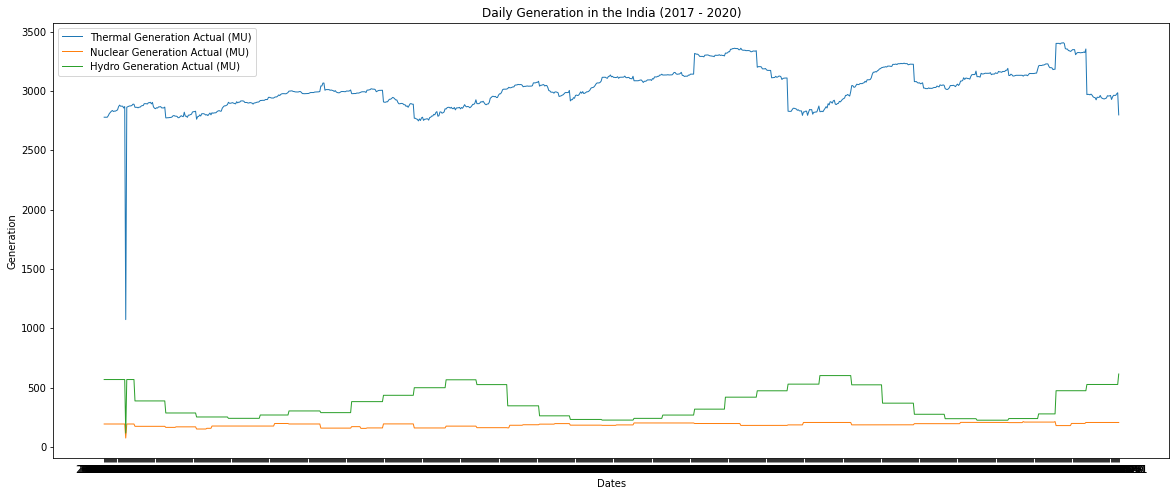

In [16]:
plt.figure(figsize=(20,8))
plt.plot(daily_gen.Thermal_Gen_Act_in_MU, label= 'Thermal Generation Actual (MU)', linewidth=1)
plt.plot(daily_gen.Nuclear_Gen_Act_in_MU, label= 'Nuclear Generation Actual (MU)', linewidth=1)
plt.plot(daily_gen.Hydro_Gen_Act_in_MU, label= 'Hydro Generation Actual (MU)', linewidth=1)
plt.title("Daily Generation in the India (2017 - 2020)")
plt.xlabel("Dates")
plt.ylabel("Generation")
plt.legend()
plt.show()

<AxesSubplot:>

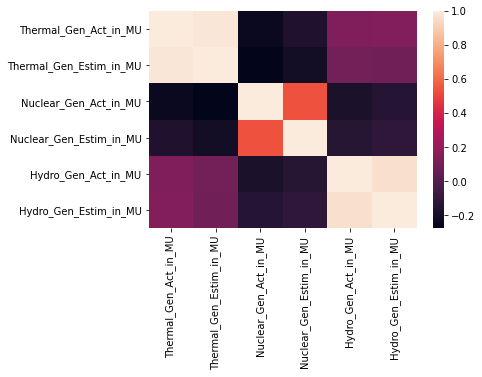

In [17]:
# correlation in the data
sns.heatmap(data.corr())

# Creating Year and Month Columns

In [18]:
data['Year'] = data['Date'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Date'].apply(lambda x: np.int(x[5:7]))
data = data.drop('Date', axis=1)

<ipython-input-18-3d7b63e85c63>:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<ipython-input-18-3d7b63e85c63>:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://

In [19]:
data

,Region,Thermal_Gen_Act_in_MU,Thermal_Gen_Estim_in_MU,Nuclear_Gen_Act_in_MU,Nuclear_Gen_Estim_in_MU,Hydro_Gen_Act_in_MU,Hydro_Gen_Estim_in_MU,Year,Month
0,Northern,624.23,484.21,30.360000,35.570000,273.27,320.81,2017,9
1,Western,1106.89,1024.33,25.170000,3.810000,72.00,21.53,2017,9
2,Southern,576.66,578.55,62.730000,49.800000,111.57,64.78,2017,9
3,Eastern,441.02,429.39,37.242208,36.987877,85.94,69.36,2017,9
4,NorthEastern,29.11,15.91,37.242208,36.987877,24.64,21.21,2017,9
...,...,...,...,...,...,...,...,...,...
4940,Northern,669.47,602.96,26.880000,23.410000,348.72,351.98,2020,8
4941,Western,1116.00,1262.10,42.370000,36.630000,54.67,20.28,2020,8
4942,Southern,494.66,415.53,61.830000,26.280000,93.49,77.25,2020,8
4943,Eastern,482.86,547.03,37.242208,36.987877,87.22,93.78,2020,8


# Encoding Labels

In [20]:
label_encoder = LabelEncoder()

data['Region'] = label_encoder.fit_transform(data['Region'])

In [21]:
data

,Region,Thermal_Gen_Act_in_MU,Thermal_Gen_Estim_in_MU,Nuclear_Gen_Act_in_MU,Nuclear_Gen_Estim_in_MU,Hydro_Gen_Act_in_MU,Hydro_Gen_Estim_in_MU,Year,Month
0,2,624.23,484.21,30.360000,35.570000,273.27,320.81,2017,9
1,4,1106.89,1024.33,25.170000,3.810000,72.00,21.53,2017,9
2,3,576.66,578.55,62.730000,49.800000,111.57,64.78,2017,9
3,0,441.02,429.39,37.242208,36.987877,85.94,69.36,2017,9
4,1,29.11,15.91,37.242208,36.987877,24.64,21.21,2017,9
...,...,...,...,...,...,...,...,...,...
4940,2,669.47,602.96,26.880000,23.410000,348.72,351.98,2020,8
4941,4,1116.00,1262.10,42.370000,36.630000,54.67,20.28,2020,8
4942,3,494.66,415.53,61.830000,26.280000,93.49,77.25,2020,8
4943,0,482.86,547.03,37.242208,36.987877,87.22,93.78,2020,8


In [22]:
data.dtypes

Region                       int32
Thermal_Gen_Act_in_MU      float64
Thermal_Gen_Estim_in_MU    float64
Nuclear_Gen_Act_in_MU      float64
Nuclear_Gen_Estim_in_MU    float64
Hydro_Gen_Act_in_MU        float64
Hydro_Gen_Estim_in_MU      float64
Year                         int64
Month                        int64
dtype: object

In [23]:
data['Total_Gen_Act_MU'] = data[['Thermal_Gen_Act_in_MU', 'Nuclear_Gen_Act_in_MU', 'Hydro_Gen_Act_in_MU']].sum(axis=1)
data['Total_Gen_Estim_MU'] = data[['Thermal_Gen_Estim_in_MU', 'Nuclear_Gen_Estim_in_MU', 'Hydro_Gen_Estim_in_MU']].sum(axis=1)
data

,Region,Thermal_Gen_Act_in_MU,Thermal_Gen_Estim_in_MU,Nuclear_Gen_Act_in_MU,Nuclear_Gen_Estim_in_MU,Hydro_Gen_Act_in_MU,Hydro_Gen_Estim_in_MU,Year,Month,Total_Gen_Act_MU,Total_Gen_Estim_MU
0,2,624.23,484.21,30.360000,35.570000,273.27,320.81,2017,9,927.860000,840.590000
1,4,1106.89,1024.33,25.170000,3.810000,72.00,21.53,2017,9,1204.060000,1049.670000
2,3,576.66,578.55,62.730000,49.800000,111.57,64.78,2017,9,750.960000,693.130000
3,0,441.02,429.39,37.242208,36.987877,85.94,69.36,2017,9,564.202208,535.737877
4,1,29.11,15.91,37.242208,36.987877,24.64,21.21,2017,9,90.992208,74.107877
...,...,...,...,...,...,...,...,...,...,...,...
4940,2,669.47,602.96,26.880000,23.410000,348.72,351.98,2020,8,1045.070000,978.350000
4941,4,1116.00,1262.10,42.370000,36.630000,54.67,20.28,2020,8,1213.040000,1319.010000
4942,3,494.66,415.53,61.830000,26.280000,93.49,77.25,2020,8,649.980000,519.060000
4943,0,482.86,547.03,37.242208,36.987877,87.22,93.78,2020,8,607.322208,677.797877


# Splitting/Scaling

In [24]:
  y = data['Region'].copy()
X = data.drop('Region', axis=1).copy()

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Modeling/Training

In [27]:
models = [
    LogisticRegression(),
    SVC(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier()
]

model_names = [
    "         Logistic Regression",
    "      Support Vector Machine",
    "              Neural Network",
    "               Decision Tree",
    "         AdaBoost Classifier",
    "          Bagging Classifier",
    "Gradient Boosting Classifier",
    "    Random Forest Classifier"
]

In [28]:
results = []

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    results.append(models[i].score(X_test, y_test))

# Results

In [29]:
for i in range(len(models)):
    print(model_names[i] + ": {:.5f}".format(results[i]))

         Logistic Regression: 0.99865
      Support Vector Machine: 1.00000
              Neural Network: 1.00000
               Decision Tree: 1.00000
         AdaBoost Classifier: 0.59906
          Bagging Classifier: 1.00000
Gradient Boosting Classifier: 1.00000
    Random Forest Classifier: 1.00000


In [30]:
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression

In [31]:
x1 = data[['Total_Gen_Estim_MU']].values
y1 = data[['Total_Gen_Act_MU']].values
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [32]:
linreg = LinearRegression()
model = linreg.fit(x1_train,y1_train)

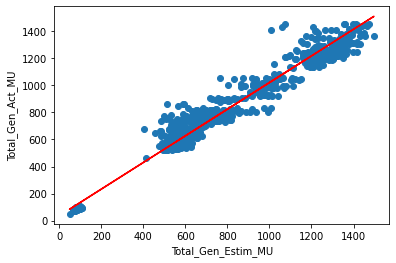

In [52]:
y1_pred = model.predict(x1_test)
# plt.figure(figsize=(18,9))
plt.xlabel("Total_Gen_Estim_MU")
plt.ylabel("Total_Gen_Act_MU")
plt.scatter(x1_test,y1_test)
plt.plot(x1_test,y1_pred,color='r')

In [34]:
f'Training score : {linreg.score(x1_train,y1_train)}'

'Training score : 0.9671587976984893'

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y1_test,y1_pred)
print(f'Test score : {score}')

Test score : 0.9686241857039192


In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y1_test, y1_pred)

4918.6950656856125

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1_test, y1_pred)

52.28629257366907

In [38]:
data1= data.drop(['Thermal_Gen_Estim_in_MU', 'Nuclear_Gen_Estim_in_MU', 'Hydro_Gen_Estim_in_MU'], axis = 1)
data1

,Region,Thermal_Gen_Act_in_MU,Nuclear_Gen_Act_in_MU,Hydro_Gen_Act_in_MU,Year,Month,Total_Gen_Act_MU,Total_Gen_Estim_MU
0,2,624.23,30.360000,273.27,2017,9,927.860000,840.590000
1,4,1106.89,25.170000,72.00,2017,9,1204.060000,1049.670000
2,3,576.66,62.730000,111.57,2017,9,750.960000,693.130000
3,0,441.02,37.242208,85.94,2017,9,564.202208,535.737877
4,1,29.11,37.242208,24.64,2017,9,90.992208,74.107877
...,...,...,...,...,...,...,...,...
4940,2,669.47,26.880000,348.72,2020,8,1045.070000,978.350000
4941,4,1116.00,42.370000,54.67,2020,8,1213.040000,1319.010000
4942,3,494.66,61.830000,93.49,2020,8,649.980000,519.060000
4943,0,482.86,37.242208,87.22,2020,8,607.322208,677.797877


In [39]:
# target = ['Total_Gen_Act_MU']
# features = ['Region', 'Thermal_Gen_Act_in_MU', 'Nuclear_Gen_Act_in_MU', 'Hydro_Gen_Act_in_MU', 'Month', 'Year']
# x2 = data[features].values.reshape(-1, len(features))
# y2 = data[target].values
# x2 = data.iloc[:, 2].values.reshape(-1, 1)
# y2 = data.iloc[:, 6]
# y2 = data[['Total_Gen_Act_MU']].values
# x2 = data['Region', 'Thermal_Gen_Act_in_MU', 'Nuclear_Gen_Act_in_MU', 'Hydro_Gen_Act_in_MU', 'Month', 'Year']
x2 = data1.drop(['Total_Gen_Act_MU'], axis = 1).values#.reshape(-1, 1)
x2 =x2[:, 1].reshape(-1, 1)
y2 = data1['Total_Gen_Act_MU'].values
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=42)

In [40]:
scaler = StandardScaler()
x2 = scaler.fit_transform(x2)

In [41]:
linreg1 = LinearRegression()
model1 = linreg1.fit(x2_train,y2_train)

In [42]:
y2_pred = model1.predict(x2_test)

'Training score : 0.9665259494783913'

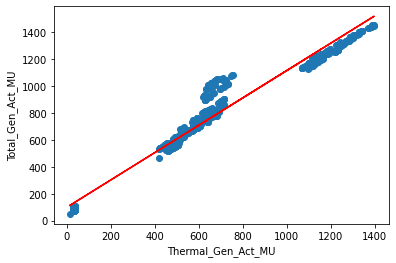

In [53]:
y2_pred = model1.predict(x2_test)
# plt.figure(figsize=(18,9))-
plt.xlabel("Thermal_Gen_Act_MU")
plt.ylabel("Total_Gen_Act_MU")
plt.scatter(x2_test,y2_test)
plt.plot(x2_test,y2_pred,color='r')

In [44]:
f'Training score : {linreg1.score(x2_train,y2_train)}'

'Training score : 0.9665259494783913'